In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('C:\\Users\\programirovanie\\files\\Anapa_airport_data_winter.csv')

In [2]:
data_for_test = data.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12004 entries, 0 to 12003
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   flight_id               12004 non-null  int64  
 1   flight_no               12004 non-null  object 
 2   scheduled_departure     12004 non-null  object 
 3   scheduled_arrival       12004 non-null  object 
 4   departure_airport       12004 non-null  object 
 5   arrival_airport         12004 non-null  object 
 6   status                  12004 non-null  object 
 7   aircraft_code           12004 non-null  object 
 8   actual_departure        12004 non-null  object 
 9   actual_arrival          12004 non-null  object 
 10  ticket_no               11995 non-null  float64
 11  flight_id.1             11995 non-null  float64
 12  fare_conditions         11995 non-null  object 
 13  amount                  11995 non-null  float64
 14  aircraft_code.1         12004 non-null

Удалим ненужные колонки. Запланированная дата время не влияет на расчеты, она примерно равна актуальному времени вылета/прилета, что в свою очередь потребуется для расчета себестоимости полета. Все рейсты имеют статус "прибывшие", поэтмоу переменная 'status' так же не имеет для нас значения, как и персональные данные клиента. Так же удалим дублирующиеся столбцы, возникшие при соединении таблиц в SQL

In [3]:
data = data.drop(['scheduled_departure', 'scheduled_arrival', 'status', 
                  "flight_id.1", "aircraft_code.1", 'ticket_no.1', 'aircraft_code.2',
                 'passenger_name', 'contact_data', ], axis=1)

In [4]:
data

,flight_id,flight_no,departure_airport,arrival_airport,aircraft_code,actual_departure,actual_arrival,ticket_no,fare_conditions,amount,...,arrival_airport_code,arrival_city,arrival_latitude,arrival_longitude,arrival_timezone,departure_airport_code,departure_city,departure_latitude,departure_longitude,departure_timezone
0,136661,PG0480,AAQ,EGO,SU9,2017-01-01T09:27:00Z,2017-01-01T10:17:00Z,5.432318e+09,Economy,6300.0,...,EGO,Belgorod,50.643799,36.590099,Europe/Moscow,AAQ,Anapa,45.002102,37.347301,Europe/Moscow
1,136661,PG0480,AAQ,EGO,SU9,2017-01-01T09:27:00Z,2017-01-01T10:17:00Z,5.432318e+09,Economy,6300.0,...,EGO,Belgorod,50.643799,36.590099,Europe/Moscow,AAQ,Anapa,45.002102,37.347301,Europe/Moscow
2,136661,PG0480,AAQ,EGO,SU9,2017-01-01T09:27:00Z,2017-01-01T10:17:00Z,5.432318e+09,Economy,6300.0,...,EGO,Belgorod,50.643799,36.590099,Europe/Moscow,AAQ,Anapa,45.002102,37.347301,Europe/Moscow
3,136661,PG0480,AAQ,EGO,SU9,2017-01-01T09:27:00Z,2017-01-01T10:17:00Z,5.432318e+09,Economy,6300.0,...,EGO,Belgorod,50.643799,36.590099,Europe/Moscow,AAQ,Anapa,45.002102,37.347301,Europe/Moscow
4,136661,PG0480,AAQ,EGO,SU9,2017-01-01T09:27:00Z,2017-01-01T10:17:00Z,5.432318e+09,Economy,6300.0,...,EGO,Belgorod,50.643799,36.590099,Europe/Moscow,AAQ,Anapa,45.002102,37.347301,Europe/Moscow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11999,136215,PG0252,AAQ,SVO,733,2017-02-28T10:09:00Z,2017-02-28T11:49:00Z,5.432352e+09,Economy,12200.0,...,SVO,Moscow,55.972599,37.414600,Europe/Moscow,AAQ,Anapa,45.002102,37.347301,Europe/Moscow
12000,136215,PG0252,AAQ,SVO,733,2017-02-28T10:09:00Z,2017-02-28T11:49:00Z,5.434148e+09,Economy,12200.0,...,SVO,Moscow,55.972599,37.414600,Europe/Moscow,AAQ,Anapa,45.002102,37.347301,Europe/Moscow
12001,136215,PG0252,AAQ,SVO,733,2017-02-28T10:09:00Z,2017-02-28T11:49:00Z,5.432334e+09,Economy,12200.0,...,SVO,Moscow,55.972599,37.414600,Europe/Moscow,AAQ,Anapa,45.002102,37.347301,Europe/Moscow
12002,136215,PG0252,AAQ,SVO,733,2017-02-28T10:09:00Z,2017-02-28T11:49:00Z,5.435173e+09,Economy,12200.0,...,SVO,Moscow,55.972599,37.414600,Europe/Moscow,AAQ,Anapa,45.002102,37.347301,Europe/Moscow


In [5]:
len(data.flight_id.unique())

127

# Предобработка

In [6]:
# Фануция, добавляющая расход построчно
def fuel_consumption_col(row):
    if row == 'Sukhoi Superjet-100':
        return fuel_consumption_SU9
    if row == 'Boeing 737-300':
        return fuel_consumption_733

In [7]:
# Функция записывает данные словаря в датафрэйм о кол-ве пасажиров
def passenger(col): 
    if col in passenger_on_board:
        return passenger_on_board[col]

In [8]:
# Функция записывает данные словаря в датафрэйм о выручке
def revenue_count(col): 
    if col in revenue:
        return revenue[col]

In [9]:
# Выводим коэфицент использования топлива от норматива для рейса в зависимости от заполняемости
def discount(col):
    if col < 0.7:
        revenue_func = 0.95
    else:
        revenue_func = 1
    return revenue_func

# Обогащение данными

Для расчета стоимость перелета нужно найти расход топлива у самолетов.

In [10]:
data.model.unique() # Какие самолеты летали из Анапы?

array(['Sukhoi Superjet-100', 'Boeing 737-300'], dtype=object)

Создадим переменные, содержащие расход топлива

In [11]:
fuel_consumption_SU9 = 1700 # кг топлива в ч 
fuel_consumption_733 = 2600 # кг/ч 

В 2017 году тонна керосина в аэропорту г. Анапы стоила 37 860 руб = 37.8 за кг.

In [12]:
fuel_consumption = 37.8

Добавим новую переменную с расходом топлива в час в DF

In [13]:
data['fuel_consumption'] = data['model'].apply(fuel_consumption_col)   

# Работа со временем

Переведем актуальное время вылета, прилета в pandas.Timestamp 

In [14]:
data['actual_departure'] = data['actual_departure'].apply(lambda x: pd.to_datetime(x)) 
data['actual_arrival'] = data['actual_arrival'].apply(lambda x: pd.to_datetime(x)) 

Рассчитаем время полета и запишем в новую переменную

In [15]:
data['time_of_flight'] = data['actual_arrival'] - data['actual_departure']

Переведем время полета в минуты, затем в часы, записав в формате десятичной дроби для дальнейшего использования

In [16]:
data['time_of_flight'] = data['time_of_flight'].astype('timedelta64[m]')
data['time_of_flight'] = data['time_of_flight'] / 60

# Заполняемость рейса

In [17]:
# Создадим словарь "номер рейса - заполняемость".
passenger_on_board =  data.groupby(['flight_id'])['ticket_no'].count()
passenger_on_board = dict(passenger_on_board)

Используем заготовленную функцию и словарь и создадим новую переменную "Заполняемость салона" - flight_occupancy

In [18]:
# Добавим число пассажиров на борту в новую переменную
data['passengers_on_board'] = data['flight_id'].apply(passenger) 

In [19]:
# Заполняемость салона
data['flight_occupancy'] = data['passengers_on_board'] / data['seat_total']

In [20]:
# Оценим показатель заполняемости

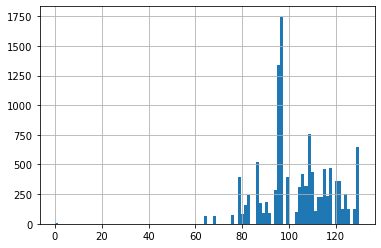

In [21]:
data['passengers_on_board'].hist(bins=100);

Обратим внимание, что есть полностью пустые рейсы. Посмотрим на них.

In [22]:
data[data['passengers_on_board'] == 0]

,flight_id,flight_no,departure_airport,arrival_airport,aircraft_code,actual_departure,actual_arrival,ticket_no,fare_conditions,amount,...,arrival_timezone,departure_airport_code,departure_city,departure_latitude,departure_longitude,departure_timezone,fuel_consumption,time_of_flight,passengers_on_board,flight_occupancy
392,136546,PG0194,AAQ,NOZ,733,2017-01-03 06:13:00+00:00,2017-01-03 11:15:00+00:00,NaN,NaN,NaN,...,Asia/Novokuznetsk,AAQ,Anapa,45.002102,37.347301,Europe/Moscow,2600,5.033333,0,0.0
1770,136523,PG0194,AAQ,NOZ,733,2017-01-10 06:14:00+00:00,2017-01-10 11:26:00+00:00,NaN,NaN,NaN,...,Asia/Novokuznetsk,AAQ,Anapa,45.002102,37.347301,Europe/Moscow,2600,5.200000,0,0.0
3235,136540,PG0194,AAQ,NOZ,733,2017-01-17 06:14:00+00:00,2017-01-17 11:21:00+00:00,NaN,NaN,NaN,...,Asia/Novokuznetsk,AAQ,Anapa,45.002102,37.347301,Europe/Moscow,2600,5.116667,0,0.0
4716,136560,PG0194,AAQ,NOZ,733,2017-01-24 06:13:00+00:00,2017-01-24 11:18:00+00:00,NaN,NaN,NaN,...,Asia/Novokuznetsk,AAQ,Anapa,45.002102,37.347301,Europe/Moscow,2600,5.083333,0,0.0
6119,136544,PG0194,AAQ,NOZ,733,2017-01-31 06:10:00+00:00,2017-01-31 11:14:00+00:00,NaN,NaN,NaN,...,Asia/Novokuznetsk,AAQ,Anapa,45.002102,37.347301,Europe/Moscow,2600,5.066667,0,0.0
7547,136514,PG0194,AAQ,NOZ,733,2017-02-07 06:14:00+00:00,2017-02-07 11:13:00+00:00,NaN,NaN,NaN,...,Asia/Novokuznetsk,AAQ,Anapa,45.002102,37.347301,Europe/Moscow,2600,4.983333,0,0.0
8949,136567,PG0194,AAQ,NOZ,733,2017-02-14 06:12:00+00:00,2017-02-14 11:23:00+00:00,NaN,NaN,NaN,...,Asia/Novokuznetsk,AAQ,Anapa,45.002102,37.347301,Europe/Moscow,2600,5.183333,0,0.0
10397,136511,PG0194,AAQ,NOZ,733,2017-02-21 06:15:00+00:00,2017-02-21 11:25:00+00:00,NaN,NaN,NaN,...,Asia/Novokuznetsk,AAQ,Anapa,45.002102,37.347301,Europe/Moscow,2600,5.166667,0,0.0
11810,136513,PG0194,AAQ,NOZ,733,2017-02-28 06:13:00+00:00,2017-02-28 11:23:00+00:00,NaN,NaN,NaN,...,Asia/Novokuznetsk,AAQ,Anapa,45.002102,37.347301,Europe/Moscow,2600,5.166667,0,0.0


Обратим внимание - мы имеем 9 рейсов без пассажиров, все они летят под одним номером рейса в Новокузнецк.

# Выручка, расходы

### Выручка

In [23]:
# Сохраним выручку по рейсам
revenue = dict(data.groupby(['flight_id'])['amount'].sum())

In [24]:
# Добавим выручку в датафрэйм с помощью функции revenue_count
data['revenue'] = data['flight_id'].apply(revenue_count) 

### Расходы

Найдем расходы в рублях на каждый рейс

In [25]:
data['expenses'] =  data['fuel_consumption'] * data['time_of_flight']
data['expenses'] = data['expenses'] * fuel_consumption

Однако если самолет летит без пассажиров или с малой загрузкой - он потребляет меньше топлива, нежели с полной.
Уменьшим расходны на 5%, если самолет загружен менее, чем на 70% с помощью discount

In [26]:
# Найдем рейсы со скидкой
data['coefficient'] = data['flight_occupancy'].apply(discount)

In [27]:
# ПРименим скидку
data['expenses'] = data['coefficient'] * data['expenses']

In [28]:
data = data.drop('coefficient', axis=1) # Удалим не нужный коэфицент

Запишем в переменную balance данные о прибыли или убытке

In [29]:
data['balance'] = data['revenue'] - data['expenses']

# Прибыль или убыток

In [30]:
processed_data = data.copy()
processed_data = processed_data.drop_duplicates(subset='flight_id', keep="first")
processed_data

,flight_id,flight_no,departure_airport,arrival_airport,aircraft_code,actual_departure,actual_arrival,ticket_no,fare_conditions,amount,...,departure_latitude,departure_longitude,departure_timezone,fuel_consumption,time_of_flight,passengers_on_board,flight_occupancy,revenue,expenses,balance
0,136661,PG0480,AAQ,EGO,SU9,2017-01-01 09:27:00+00:00,2017-01-01 10:17:00+00:00,5.432318e+09,Economy,6300.0,...,45.002102,37.347301,Europe/Moscow,1700,0.833333,96,0.989691,759000.0,53550.0,705450.0
96,136420,PG0252,AAQ,SVO,733,2017-01-01 10:09:00+00:00,2017-01-01 11:47:00+00:00,5.432349e+09,Economy,13400.0,...,45.002102,37.347301,Europe/Moscow,2600,1.633333,104,0.800000,1542000.0,160524.0,1381476.0
200,136936,PG0480,AAQ,EGO,SU9,2017-01-02 09:28:00+00:00,2017-01-02 10:18:00+00:00,5.432318e+09,Economy,6300.0,...,45.002102,37.347301,Europe/Moscow,1700,0.833333,82,0.845361,632400.0,53550.0,578850.0
282,136458,PG0252,AAQ,SVO,733,2017-01-02 10:07:00+00:00,2017-01-02 11:46:00+00:00,5.432363e+09,Economy,13400.0,...,45.002102,37.347301,Europe/Moscow,2600,1.650000,110,0.846154,1568800.0,162162.0,1406638.0
392,136546,PG0194,AAQ,NOZ,733,2017-01-03 06:13:00+00:00,2017-01-03 11:15:00+00:00,NaN,NaN,NaN,...,45.002102,37.347301,Europe/Moscow,2600,5.033333,0,0.000000,0.0,469942.2,-469942.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11605,136953,PG0480,AAQ,EGO,SU9,2017-02-27 09:27:00+00:00,2017-02-27 10:17:00+00:00,5.432377e+09,Economy,6300.0,...,45.002102,37.347301,Europe/Moscow,1700,0.833333,97,1.000000,765300.0,53550.0,711750.0
11702,136266,PG0252,AAQ,SVO,733,2017-02-27 10:08:00+00:00,2017-02-27 11:48:00+00:00,5.435173e+09,Economy,12200.0,...,45.002102,37.347301,Europe/Moscow,2600,1.666667,108,0.830769,1566400.0,163800.0,1402600.0
11810,136513,PG0194,AAQ,NOZ,733,2017-02-28 06:13:00+00:00,2017-02-28 11:23:00+00:00,NaN,NaN,NaN,...,45.002102,37.347301,Europe/Moscow,2600,5.166667,0,0.000000,0.0,482391.0,-482391.0
11811,136844,PG0480,AAQ,EGO,SU9,2017-02-28 09:26:00+00:00,2017-02-28 10:16:00+00:00,5.432321e+09,Economy,6300.0,...,45.002102,37.347301,Europe/Moscow,1700,0.833333,79,0.814433,575100.0,53550.0,521550.0


In [31]:
processed_data.groupby(['flight_no'])['balance'].sum()

flight_no
PG0194    -4294836.00
PG0252    87264180.00
PG0480    38753518.95
Name: balance, dtype: float64

Мы имеем 3 рейса из города Анапы, из которых 2 являются прибыльными, а один убыточным.
Рейс в Москву приносит больше прибыли, чем в белгород. Рейсы в Новокузнецк являются убыточными

# Рейс PG0194

In [32]:
# Выведем все полеты под рейсом PG0194
processed_data[processed_data['flight_no'] == 'PG0194']    

,flight_id,flight_no,departure_airport,arrival_airport,aircraft_code,actual_departure,actual_arrival,ticket_no,fare_conditions,amount,...,departure_latitude,departure_longitude,departure_timezone,fuel_consumption,time_of_flight,passengers_on_board,flight_occupancy,revenue,expenses,balance
392,136546,PG0194,AAQ,NOZ,733,2017-01-03 06:13:00+00:00,2017-01-03 11:15:00+00:00,NaN,NaN,NaN,...,45.002102,37.347301,Europe/Moscow,2600,5.033333,0,0.0,0.0,469942.2,-469942.2
1770,136523,PG0194,AAQ,NOZ,733,2017-01-10 06:14:00+00:00,2017-01-10 11:26:00+00:00,NaN,NaN,NaN,...,45.002102,37.347301,Europe/Moscow,2600,5.200000,0,0.0,0.0,485503.2,-485503.2
3235,136540,PG0194,AAQ,NOZ,733,2017-01-17 06:14:00+00:00,2017-01-17 11:21:00+00:00,NaN,NaN,NaN,...,45.002102,37.347301,Europe/Moscow,2600,5.116667,0,0.0,0.0,477722.7,-477722.7
4716,136560,PG0194,AAQ,NOZ,733,2017-01-24 06:13:00+00:00,2017-01-24 11:18:00+00:00,NaN,NaN,NaN,...,45.002102,37.347301,Europe/Moscow,2600,5.083333,0,0.0,0.0,474610.5,-474610.5
6119,136544,PG0194,AAQ,NOZ,733,2017-01-31 06:10:00+00:00,2017-01-31 11:14:00+00:00,NaN,NaN,NaN,...,45.002102,37.347301,Europe/Moscow,2600,5.066667,0,0.0,0.0,473054.4,-473054.4
7547,136514,PG0194,AAQ,NOZ,733,2017-02-07 06:14:00+00:00,2017-02-07 11:13:00+00:00,NaN,NaN,NaN,...,45.002102,37.347301,Europe/Moscow,2600,4.983333,0,0.0,0.0,465273.9,-465273.9
8949,136567,PG0194,AAQ,NOZ,733,2017-02-14 06:12:00+00:00,2017-02-14 11:23:00+00:00,NaN,NaN,NaN,...,45.002102,37.347301,Europe/Moscow,2600,5.183333,0,0.0,0.0,483947.1,-483947.1
10397,136511,PG0194,AAQ,NOZ,733,2017-02-21 06:15:00+00:00,2017-02-21 11:25:00+00:00,NaN,NaN,NaN,...,45.002102,37.347301,Europe/Moscow,2600,5.166667,0,0.0,0.0,482391.0,-482391.0
11810,136513,PG0194,AAQ,NOZ,733,2017-02-28 06:13:00+00:00,2017-02-28 11:23:00+00:00,NaN,NaN,NaN,...,45.002102,37.347301,Europe/Moscow,2600,5.166667,0,0.0,0.0,482391.0,-482391.0


In [33]:
# Найдем общий убыток
processed_data[processed_data['flight_no'] == 'PG0194']['balance'].sum()

-4294836.0

In [34]:
# Найдем средний убыток
processed_data[processed_data['flight_no'] == 'PG0194']['balance'].mean()

-477204.0

Обратим внимание, что все рейсы в Новокузнецк были убыточными и не имели на борту пассажиров. Убыток от каждого полета составлял почти по 0,5 миллиона рублей. Этого рейса в зимнем расписании быть недолжно. Совокупный убыток с этого направления 4,294,836

# Рейс PG0252  

In [35]:
# Подготовим DF с рейсом PG0252

In [36]:
data_PG0252 = processed_data[processed_data['flight_no'] == 'PG0252']

In [37]:
data_PG0252

,flight_id,flight_no,departure_airport,arrival_airport,aircraft_code,actual_departure,actual_arrival,ticket_no,fare_conditions,amount,...,departure_latitude,departure_longitude,departure_timezone,fuel_consumption,time_of_flight,passengers_on_board,flight_occupancy,revenue,expenses,balance
96,136420,PG0252,AAQ,SVO,733,2017-01-01 10:09:00+00:00,2017-01-01 11:47:00+00:00,5.432349e+09,Economy,13400.0,...,45.002102,37.347301,Europe/Moscow,2600,1.633333,104,0.800000,1542000.0,160524.0,1381476.0
282,136458,PG0252,AAQ,SVO,733,2017-01-02 10:07:00+00:00,2017-01-02 11:46:00+00:00,5.432363e+09,Economy,13400.0,...,45.002102,37.347301,Europe/Moscow,2600,1.650000,110,0.846154,1568800.0,162162.0,1406638.0
474,136119,PG0252,AAQ,SVO,733,2017-01-03 10:08:00+00:00,2017-01-03 11:49:00+00:00,5.432350e+09,Economy,12200.0,...,45.002102,37.347301,Europe/Moscow,2600,1.683333,113,0.869231,1653000.0,165438.0,1487562.0
683,136159,PG0252,AAQ,SVO,733,2017-01-04 10:07:00+00:00,2017-01-04 11:45:00+00:00,5.435489e+09,Economy,12200.0,...,45.002102,37.347301,Europe/Moscow,2600,1.633333,115,0.884615,1700600.0,160524.0,1540076.0
880,136202,PG0252,AAQ,SVO,733,2017-01-05 10:07:00+00:00,2017-01-05 11:49:00+00:00,5.434147e+09,Economy,12200.0,...,45.002102,37.347301,Europe/Moscow,2600,1.700000,100,0.769231,1495600.0,167076.0,1328524.0
1075,136209,PG0252,AAQ,SVO,733,2017-01-06 10:09:00+00:00,2017-01-06 11:49:00+00:00,5.434147e+09,Economy,12200.0,...,45.002102,37.347301,Europe/Moscow,2600,1.666667,112,0.861538,1615200.0,163800.0,1451400.0
1187,136164,PG0252,AAQ,SVO,733,2017-01-07 10:07:00+00:00,2017-01-07 11:46:00+00:00,5.432333e+09,Business,36600.0,...,45.002102,37.347301,Europe/Moscow,2600,1.650000,120,0.923077,1738400.0,162162.0,1576238.0
1479,136122,PG0252,AAQ,SVO,733,2017-01-08 10:08:00+00:00,2017-01-08 11:48:00+00:00,5.434147e+09,Economy,12200.0,...,45.002102,37.347301,Europe/Moscow,2600,1.666667,97,0.746154,1431000.0,163800.0,1267200.0
1670,136464,PG0252,AAQ,SVO,733,2017-01-09 10:07:00+00:00,2017-01-09 11:47:00+00:00,5.432363e+09,Economy,12200.0,...,45.002102,37.347301,Europe/Moscow,2600,1.666667,100,0.769231,1398000.0,163800.0,1234200.0
1867,136423,PG0252,AAQ,SVO,733,2017-01-10 10:12:00+00:00,2017-01-10 11:52:00+00:00,5.432350e+09,Economy,12200.0,...,45.002102,37.347301,Europe/Moscow,2600,1.666667,129,0.992308,1849400.0,163800.0,1685600.0


Посмотрим на выручку по каждому рейсу

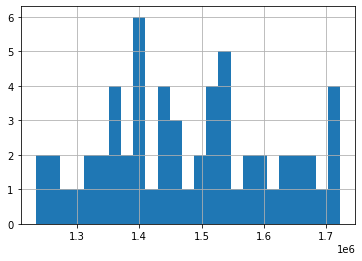

In [38]:
data_PG0252['balance'].hist(bins=25);

Выручку по всем рейсам

In [39]:
data_PG0252['balance'].sum()

87264180.0

Обратим внимание, что все рейсы прибыльные. Посмотрим на другие статистические показатели

In [40]:
PG0252_balance_sum = data_PG0252['balance'].sum()
PG0252_balance_min = data_PG0252['balance'].min()
PG0252_balance_max = data_PG0252['balance'].max()
PG0252_balance_mean = data_PG0252['balance'].mean()
print('sum:', PG0252_balance_sum)
print('min:', PG0252_balance_min)
print('max:', PG0252_balance_max)
print('mean:', PG0252_balance_mean)

sum: 87264180.0
min: 1234200.0
max: 1722200.0
mean: 1479053.8983050848


Посмотрим заполняемость рейсов

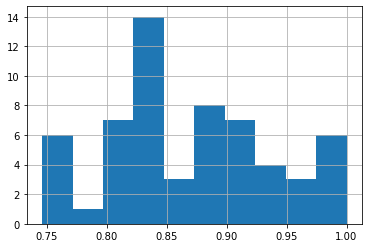

In [41]:
data_PG0252['flight_occupancy'].hist(bins=10);

Какие самолеты летают на рейсе?

In [42]:
data_PG0252.aircraft_code.value_counts()
#Боинг 737-300

733    59
Name: aircraft_code, dtype: int64

In [43]:
# Найдем средную прибыль рейса
data_PG0252['balance'].mean()

1479053.8983050848

# Гипотеза о Рейсе PG0252  

##### Получится ли увеличить прибыль, если заменем 15 самолетов на наименее вместительные в наименее заполненных рйесах?

Возьмем 15 наименее прибыльных рейсов

In [44]:
data_PG0252_min_733 = data_PG0252.sort_values(by = 'balance')[:15]

Найдем медианную выручку за билет (только эконом класс)

In [45]:
data_PG0252_min_733_amount_mean = data_PG0252_min_733.amount.mean()

Поменяем самолет в указанных 15 рейсах на менее вместимый и менее затратный SU9

In [46]:
data_PG0252_min_SU9 = data_PG0252_min_733.copy()

In [47]:
data_PG0252_min_SU9['aircraft_code'] = 'SU9'
data_PG0252_min_SU9['seat_total'] = 97
data_PG0252_min_SU9['fuel_consumption'] = fuel_consumption_SU9

Выручка. Предположим, что все рейсы идут заполенными, ведь минимальное количество пассажиров на Боинге было выше, чем вместимость SU9

In [48]:
# Зафиксируем прогнозируемую средную цену билета
data_PG0252_min_SU9['amount'] = data_PG0252_min_733_amount_mean

In [49]:
# Зафиксируем прогнозируемую выручку с рейса
data_PG0252_min_SU9['revenue'] = data_PG0252_min_733_amount_mean * 97

In [50]:
# Посчитаем расъоды керосина в тоннаъ
data_PG0252_min_SU9['expenses'] =  data_PG0252_min_SU9['fuel_consumption'] * data_PG0252_min_SU9['time_of_flight']
# Переведем в рубли
data_PG0252_min_SU9['expenses'] = data_PG0252_min_SU9['expenses'] * 37.8
# Посчитаем прибыль (убыток)
data_PG0252_min_SU9['balance'] = data_PG0252_min_SU9['revenue'] - data_PG0252_min_SU9['expenses']

Сравним показатели доходов и расходов

In [51]:
PG0252_min_733_expenses = data_PG0252_min_733['expenses'].sum()
PG0252_min_SU9_expenses = data_PG0252_min_SU9['expenses'].sum()
PG0252_min_733_revenue = data_PG0252_min_733['revenue'].sum()
PG0252_min_SU9_revenue = data_PG0252_min_SU9['revenue'].sum()

In [52]:
print('733 expenses:', PG0252_min_733_expenses)
print('SU9 expenses:', PG0252_min_SU9_expenses)

733 expenses: 2470104.0
SU9 expenses: 1615068.0


In [53]:
print('733 revenue:', PG0252_min_733_revenue)
print('SU9 revenue:', PG0252_min_SU9_revenue)

733 revenue: 22227000.0
SU9 revenue: 20117800.0


Себестоимость полета 733 значительно выше, чем на SU9

Сравним показатели баланса

In [54]:
data_PG0252_min_733_min = data_PG0252_min_733['balance'].min()
data_PG0252_min_733_max = data_PG0252_min_733['balance'].max()
data_PG0252_min_733_mean = data_PG0252_min_733['balance'].mean()
data_PG0252_min_SU9_min = data_PG0252_min_SU9['balance'].min()
data_PG0252_min_SU9_max = data_PG0252_min_SU9['balance'].max()
data_PG0252_min_SU9_mean = data_PG0252_min_SU9['balance'].mean()
print('PG0252_min_733 min:', data_PG0252_min_733_min)
print('PG0252_min_SU9 min:', data_PG0252_min_SU9_min)
print('PG0252_min_733 max:', data_PG0252_min_733_max)
print('PG0252_min_SU9 max:', data_PG0252_min_SU9_max)
print('PG0252_min_733 mean:', data_PG0252_min_733_mean)
print('PG0252_min_SU9 mean:', data_PG0252_min_SU9_mean)

PG0252_min_733 min: 1234200.0
PG0252_min_SU9 min: 1230873.6666666665
PG0252_min_733 max: 1380600.0
PG0252_min_SU9 max: 1235157.6666666665
PG0252_min_733 mean: 1317126.4
PG0252_min_SU9 mean: 1233515.4666666663


In [55]:
# Посмотрим на итоги по прибыли (убытку)
data_PG0252_min_733_sum = data_PG0252_min_733['balance'].sum()
data_PG0252_min_SU9_sum = data_PG0252_min_SU9['balance'].sum()

print('PG0252_min_733 balance:', data_PG0252_min_733_sum)
print('PG0252_min_SU9 balance:', data_PG0252_min_SU9_sum)

PG0252_min_733 balance: 19756896.0
PG0252_min_SU9 balance: 18502731.999999996


Итог: Использование самолета 733 c экономической точки зрения оправдано, даже на рейсах с наименьшей заполняемостью. Возможно SU9 покажет себя лучше в отдельно-взятых рейсах, но смена самолета повлечет за собой изменение графика полтеов ряда других самолетов, что может негативно сказаться на других рейсах.

# Рейс PG0480       

In [56]:
# Рейс в Белгород
PG0480 = processed_data[processed_data['flight_no'] == 'PG0480'] 

In [57]:
# Какие самолеты используются на рейсе?
PG0480.model.value_counts()

Sukhoi Superjet-100    59
Name: model, dtype: int64

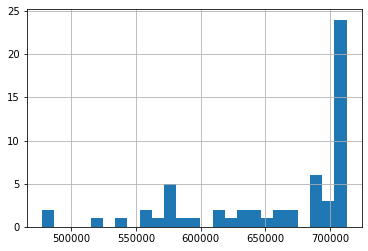

In [58]:
PG0480['balance'].hist(bins=25);

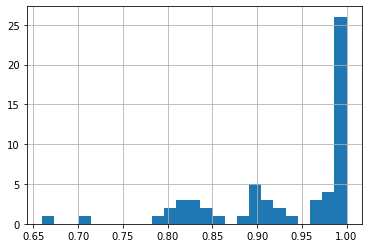

In [59]:
# Сравним с заполняемостью
PG0480.flight_occupancy.hist(bins=25);

In [60]:
# Минимальная выручка (убыток)
PG0480['balance'].min()

477450.0

In [61]:
# Средняя выручка
PG0480['balance'].mean()

656839.3042372882

Мы видим, что все рейсы являются прибыльными. Так же видно направление дальнейшего анализа - около большинство рейсов летают с большой загрузкой и около полновины с полной. Возможно использования более вместительного самолета сможет принести юольшую прибыль

# Визуализация результатов

flight_no
PG0194    AxesSubplot(0.125,0.125;0.775x0.755)
PG0252    AxesSubplot(0.125,0.125;0.775x0.755)
PG0480    AxesSubplot(0.125,0.125;0.775x0.755)
Name: balance, dtype: object

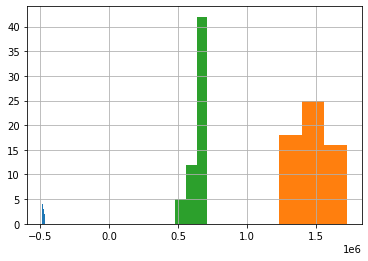

In [62]:
processed_data.groupby(['flight_no'])['balance'].hist(bins = 3)

<AxesSubplot:xlabel='flight_no'>

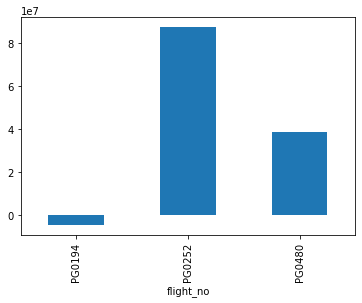

In [63]:
processed_data.groupby(['flight_no'])['balance'].sum().plot(x="balance", y=["PG0252", "PG0480", "PG0194"],kind="bar")